- title: Data Science in Germany
- author: Fabian Geiger
- date: 2017-09-12
- category: Machine Learning
- tags: R



With the steadily increasing amount of data, the importance of handling it is more relevant than ever. Keywords like big data, business intelligence, data analytics and such are trending on many news sites. I wanted to get a clearer picture of the situation and decided to take a look at the job market in Germany. I used the open-source language R and Jupyter Notebook for the analysis and documentation.

To get some data to work with, I scraped the site [monster.de](https://www.monster.de) for job openings, searching for the term "Data Science". I excluded offerings for internships and part-time jobs.

For the scraping I used the rvest-library combined with SelectorGadget, a point and click CSS selector. This made it easy to get a hold of the data I was looking for.

The following code loops through the pages of [monster.de](https://www.monster.de), scrapes the company name of each job opening and creates a vector with 315 dimensions in total.


```R
library(rvest)

companies = unlist(lapply(paste0("https://www.monster.de/jobs/suche/Festanstellung+Freie-Mitarbeit-Dienstvertrag+Vollzeit_888?cy=de&q=Data-Science&where=deutschland&rad=20-km&page=", 1:13),
              function(url){
                url %>% read_html() %>% 
                  html_nodes(".company span") %>% 
                  html_text()
              }))
```

<table>
<thead><th>id</th><th>company_name</th></thead>
<tbody>
  <tr><td>310</td><td>Gefunden bei: SAP                                               </td></tr>
  <tr><td>311</td><td>Gefunden bei: SAP                                               </td></tr>
  <tr><td>312</td><td>Gefunden bei: SAP PS Consultants fuer Grossunternehmen in Bayern</td></tr>
  <tr><td>313</td><td>Gefunden bei: SAP                                               </td></tr>
  <tr><td>314</td><td>Gefunden bei: Digital Performance GmbH                          </td></tr>
  <tr><td>315</td><td>Gefunden bei: SAP                                               </td></tr>
</tbody>
</table>


Scraped data often has to be cleaned as the aquired data is inconsistent. In the following gsub() uses regular expressions and eliminates  the "Gefunden bei: " string at the beginning of some of the company names.


```R
companies_clean = gsub("Gefunden bei: ", "", companies)
```

<table>
<thead><th>id</th><th>company_name</th></thead>
<tbody>
  <tr><td>310</td><td>SAP                                               </td></tr>
  <tr><td>311</td><td>SAP                                               </td></tr>
  <tr><td>312</td><td>SAP PS Consultants fuer Grossunternehmen in Bayern</td></tr>
  <tr><td>313</td><td>SAP                                               </td></tr>
  <tr><td>314</td><td>Digital Performance GmbH                          </td></tr>
  <tr><td>315</td><td>SAP                                               </td></tr>
</tbody>
</table>

The table() function then outputs the frequency of each of the company names. The frequencies are  tied to each company name and displayed in a matrix.

```R
companies_freq = as.data.frame(table(companies_clean))
```

<table>
<thead><th>id</th><th>company</th><th>frequency</th></thead>
<tbody>
  <tr><td>6</td><td>Accenture                                         </td><td>1                                                 </td></tr>
  <tr><td>7</td><td>Adidas                                            </td><td>1                                                 </td></tr>
  <tr><td>8</td><td>Amazon                                            </td><td>1                                                 </td></tr>
  <tr><td>9</td><td>Amgen                                             </td><td>1                                                 </td></tr>
  <tr><td>10</td><td>anykey GmbH                                       </td><td>2                                                 </td></tr>
  <tr><td>11</td><td>AppLift                                           </td><td>1                                                 </td></tr>
  <tr><td>12</td><td>Arvato Bertelsmann - (Embrace) Recruiting Services</td><td>1                                                 </td></tr>
  <tr><td>13</td><td>arvato Financial Solutions                        </td><td>1                                                 </td></tr>
</tbody>
</table>

I not only wanted to know which companies are focusing on data science, but also if it is limited to big cities only. For this step, I scraped the location component of each job opening.


```R
locations = unlist(lapply(paste0("https://www.monster.de/jobs/suche/Festanstellung+Freie-Mitarbeit-Dienstvertrag+Vollzeit_888?cy=de&q=Data-Science&where=deutschland&rad=20-km&page=", 1:13),
                          function(url){
                            url %>% read_html() %>% 
                              html_nodes(".location a") %>% 
                              html_text()
                          }))
```

<table>
<thead><th>id</th><th>location</th></thead>
<tbody>
  <tr><td>20</td><td>
Dresden, Sachsen
         </td></tr>
  <tr><td>21</td><td>
Nürnberg, Bayern
         </td></tr>
  <tr><td>22</td><td>
München, Bayern
          </td></tr>
  <tr><td>23</td><td>
Bonn, Nordrhein-Westfalen
</td></tr>
  <tr><td>24</td><td>
München, Bayern
          </td></tr>
  <tr><td>25</td><td>
Hannover, Niedersachsen
  </td></tr>
  <tr><td>26</td><td>
München, Bayern
          </td></tr>
  <tr><td>27</td><td>
München, Bayern
          </td></tr>
</tbody>
</table>

The scraped location data was even messier than the former company name data. More data cleaning had to be done.


```R
locations_clean = gsub("\r\n", "", locations)
locations_clean = gsub(",.*", "", locations_clean)
locations_clean = gsub("\u00FC", "ue", locations_clean)
locations_clean = gsub("\u00F6", "oe", locations_clean)
```

<table>
<thead><th>id</th><th>location</th></thead>
<tbody>
  <tr><td>20</td><td>Dresden  </td></tr>
  <tr><td>21</td><td>Nuernberg</td></tr>
  <tr><td>22</td><td>Muenchen </td></tr>
  <tr><td>23</td><td>Bonn     </td></tr>
  <tr><td>24</td><td>Muenchen </td></tr>
  <tr><td>25</td><td>Hannover </td></tr>
  <tr><td>26</td><td>Muenchen </td></tr>
  <tr><td>27</td><td>Muenchen </td></tr>
</tbody>
</table>

Storing the cleaned locations into a data frame and attaching the frequencies allowed for a nice overview of the data.

```R
locations_freq = as.data.frame(table(locations_clean))
```

<table>
<thead><th>id</th><th>location</th><th>frequency</th></thead>
<tbody>
  <tr><td>2</td><td>Aachen                </td><td> 1                    </td></tr>
  <tr><td>3</td><td>Aschheim              </td><td> 2                    </td></tr>
  <tr><td>4</td><td>Augsburg              </td><td> 2                    </td></tr>
  <tr><td>5</td><td>Bad Homburg v.d. Hoehe</td><td> 1                    </td></tr>
  <tr><td>6</td><td>Baden-Baden           </td><td> 1                    </td></tr>
  <tr><td>7</td><td>Bayern                </td><td> 1                    </td></tr>
  <tr><td>8</td><td>Berlin                </td><td>38                    </td></tr>
</tbody>
</table>

To better understand the data I wanted to visualize the data on a map. Importing the ggmap-library allows quick access and usage of the Google Maps API.


```R
library(ggmap)
```

To visualize the data on a map, the location names had to be transformed to latitude and longitude values. The geocode() function accesses the Google Maps API and does exactly that. The method below traverses the data frame and geocodes every location.


```R
data = lapply(locations_freq[,1], function(x){
  geocode(toString(x))
})
```

<table>
<tbody>
  <tr><td>-93.21909</td><td>30.23101 </td><td>6.083887 </td><td>50.77535 </td><td>11.71591 </td>⋯        <td>7.220952 </td><td>51.14052 </td><td>8.239761 </td><td>50.07822 </td></tr>
</tbody>
</table>

Transposing the above data frame gives a better view of the data. Unfortunately, latitude and longitude are in a single column. To seperate them I picked every second element from the data frame starting with the first (and second respectively).

<table>
<tbody>
  <tr><td>lon</td><td>-93.219090</td></tr>
  <tr><td>lat</td><td> 30.231008</td></tr>
  <tr><td>lon.1</td><td>  6.083887</td></tr>
  <tr><td>lat.1</td><td> 50.775346</td></tr>
  <tr><td>lon.2</td><td> 11.715910</td></tr>
  <tr><td>lat.2</td><td> 48.172310</td></tr>
</tbody>
</table>

```R
lon = df[seq(1,length(df),2)]
```

<table>
<thead><th>longitude</th></thead>
<tbody>
  <tr><td>-93.219090</td></tr>
  <tr><td>  6.083887</td></tr>
  <tr><td> 11.715910</td></tr>
  <tr><td> 10.897790</td></tr>
  <tr><td>  8.618162</td></tr>
  <tr><td>  8.228524</td></tr>
</tbody>
</table>

Binding the now separate latitude and longitude to the location name and its frequency gives a data frame that can be used for the visualization.


```R
m = data.frame(locations_freq, lon, lat)
```


<table>
<thead><th>id</th><th>location</th><th>longitude</th><th>latitude</th></thead>
<tbody>
  <tr><td>2</td><td>Aachen                </td><td> 1                    </td><td> 6.083887             </td><td>50.77535              </td></tr>
  <tr><td>3</td><td>Aschheim              </td><td> 2                    </td><td>11.715910             </td><td>48.17231              </td></tr>
  <tr><td>4</td><td>Augsburg              </td><td> 2                    </td><td>10.897790             </td><td>48.37054              </td></tr>
  <tr><td>5</td><td>Bad Homburg v.d. Hoehe</td><td> 1                    </td><td> 8.618162             </td><td>50.22683              </td></tr>
  <tr><td>6</td><td>Baden-Baden           </td><td> 1                    </td><td> 8.228524             </td><td>48.76564              </td></tr>
  <tr><td>7</td><td>Bayern                </td><td> 1                    </td><td>11.497889             </td><td>48.79045              </td></tr>
  <tr><td>8</td><td>Berlin                </td><td>38                    </td><td>13.404954             </td><td>52.52001              </td></tr>
</tbody>
</table>

In the last step, the aquired data is finally plotted onto a map of Germany.


```R
Germany = get_map(location = 'Germany', zoom = 6)
p = ggmap(Germany)
p <- p + geom_point(data = m, aes(x=lon, y=lat, size = m$Freq, color = "red"))
```

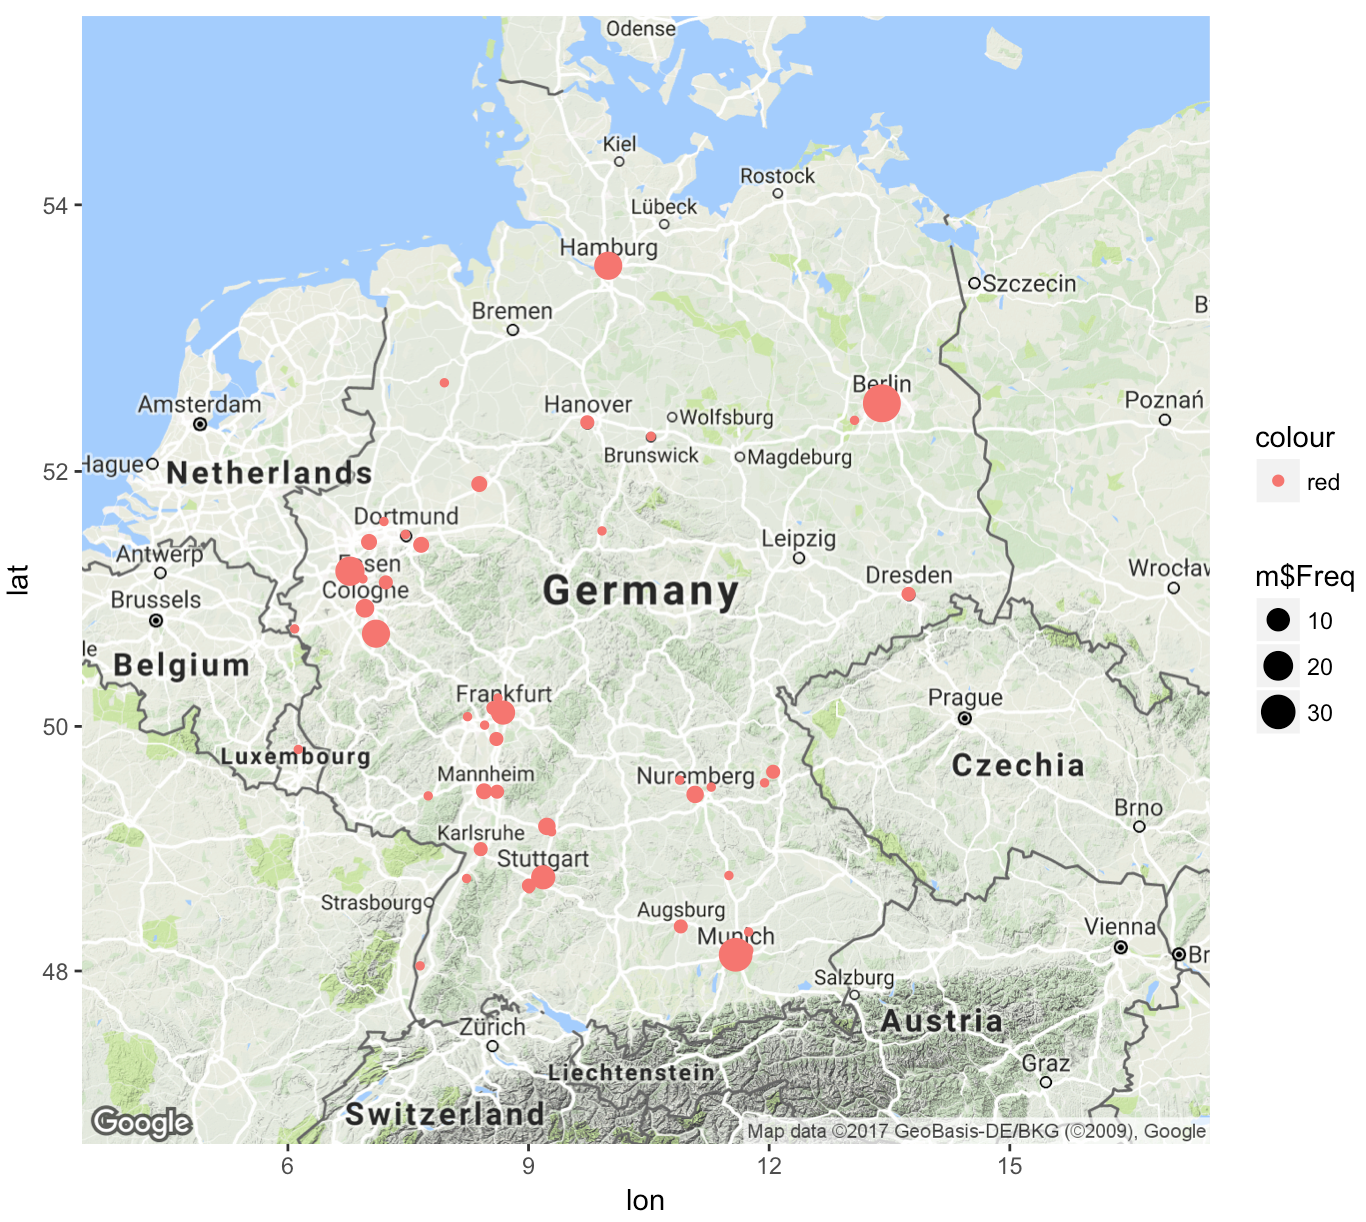

Berlin and Munich as leading cities was no big surprise. Although I did expect some jobs in North Rine-Westphalia, the cluster around Cologne was unexpected. 
It seems that Germany is a rising market for data science. Even if the regional distribution is not yet given, with a total of number of 315 job openings, there seems to be solid foundation for future development.